In [1]:
import pandas as pd
import numpy as np

import matplotlib as m_plt
from matplotlib import pyplot as plt
import matplotlib.mlab as mlabQ

import seaborn as sns

from copy import copy
from pprint import pprint

import sys
import os

import personal_plotter as p_plt

# Practica III - Data Exploration Part 3
_ _ _
___
_ _ _


## 1.- Data 1 - Boston House Pricing

### 1.1.- Retrieving Data

#### 1.1.1.- Reading Data

In [2]:
try :
    boston_dataset = pd.read_csv("./boston/housing.data", sep="\t", header=None)
    boston_dataset.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
except:
    print("ERROR, DATA NOT LOADED")
else:
    print("""DATA SUCCESSFULLY LOADED\n
    \tRows\t:\t{:d}\t|\tColumns\t:\t{:d}""".format(boston_dataset.shape[0], boston_dataset.shape[1]))

DATA SUCCESSFULLY LOADED

    	Rows	:	506	|	Columns	:	14


#### 1.1.2.- Data Labels
0. **CRIM**      :  *per capita crime rate by town*
2. **ZN**        :  *proportion of residential land zoned for lots over 25,000 sq.ft.*
3. **INDUS**     :  *proportion of non-retail business acres per town*
4. **CHAS**      :  *Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)*
5. **NOX**       :  *nitric oxides concentration (parts per 10 million)*
6. **RM**        :  *average number of rooms per dwelling*
7. **AGE**       :  *proportion of owner-occupied units built prior to 1940*
8. **DIS**       :  *weighted distances to five Boston employment centres*
9. **RAD**       :  *index of accessibility to radial highways*
10. **TAX**      :  *full-value property-tax rate per \$10 000*
11. **PTRATIO**  :  *pupil-teacher ratio by town*
12. **B**        :  *1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town*
13. **LSTAT**    :  *\% lower status of the population*
14. **MEDV**     :  *Median value of owner-occupied homes in \$1000's*

#### 1.1.3.- Viewing Data

In [3]:
boston_dataset.iloc[4:12, :]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9
10,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45,15.0
11,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311.0,15.2,396.90,13.27,18.9


### 1.2.- Attributes Choose

#### 1.2.1.- Choosed Attributes and Hypothesis

**Hypothesis** : The houses near to the industrial center are more expensive because being Boston a mainly industrial center (at that time) far places implies more time expended traveling to there.

**Attributes**

* **ZN (id 1)**        :  *proportion of residential land zoned for lots over 25,000 sq.ft.*
    > Available Places Criteria I, Supply
* **RM (id 5)**        :  *average number of rooms per dwelling*
    > Available Places Criteria II, Supply
* **DIS (id 7)**       :  *weighted distances to five Boston employment centres*
    > "Nearly to" Criteria, Demand
* **RAD (id 8)**       :  *index of accessibility to radial highways*
    > Variable who affects directly in the traveling time, Demand.
* **MEDV (id 13)**     :  *Median value of owner-occupied homes in \$1000's*
    > Affects directly in the rent value, Expensiveness.
   
#### 1.2.2.- Selecting Data

In [4]:
case_data_Boston = boston_dataset.iloc[:,[1, 5, 7, 8, 13]].copy()
case_data_Boston.columns = ["Available x25K ft", "Rooms", "Distance", "Accessibility", "Cost x 1K"]

##### 1.2.2.1.- Normalize

In [5]:
case_data_Boston_norm = (case_data_Boston - case_data_Boston.min())
case_data_Boston_norm = (case_data_Boston_norm / case_data_Boston_norm.max())

not_norm_case_data_Boston = case_data_Boston.copy()

case_data_Boston = case_data_Boston_norm

##### 1.2.2.2.- Creating Targets

In [6]:
# not normalized

temp_targets = p_plt.make_targets(not_norm_case_data_Boston.iloc[:, 4], samples=3)
not_norm_case_data_Boston["target"] = temp_targets

# normalized

temp_targets = p_plt.make_targets(case_data_Boston.iloc[:, 4], samples=3, labels=["Low Cost", "Normal Cost", "High Cost"])

case_data_Boston["target"] = temp_targets

### 1.3 Data Exploration

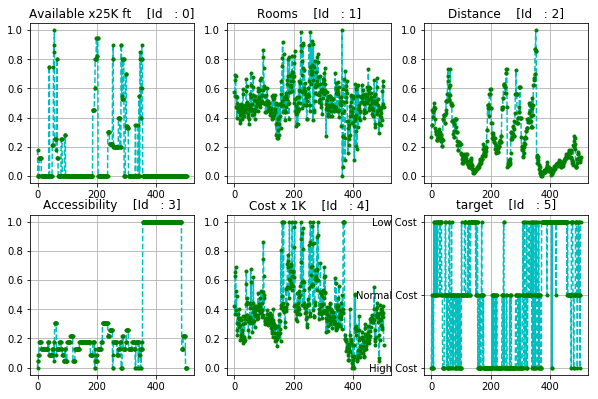

In [7]:
p_plt.dummy_DataFrame_plotter(case_data_Boston,
                        plot_size=(10,10), 
                        mixed_style=True,
                        plot_style=["c--", "g."], 
                        grid=True).show()

#### 1.3.1 Histogram

***Below : 1rst Not Normalize Data, 2nd Normalize Data (normal base)***

##### PLOT

In [8]:
target_names = case_data_Boston['target'].unique()
columns = case_data_Boston.columns.tolist()

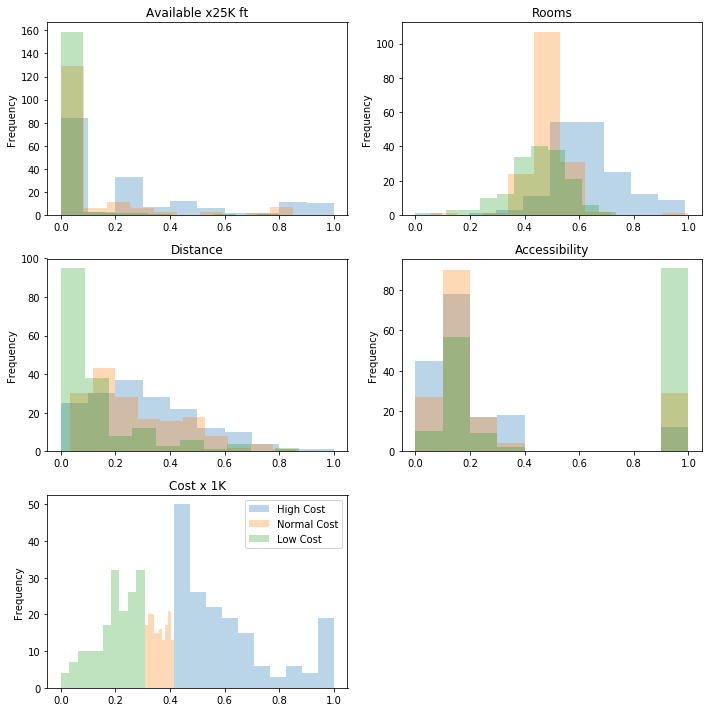

In [ ]:
p_plt.multy_hist(case_data_Boston, columns, target_names).show()

In [ ]:
sns.pairplot(data=case_data_Boston, vars=columns[:-1], hue='target')
plt.show()

In [ ]:
stats = not_norm_case_data_Boston.describe()
print(stats)

In [ ]:
p_plt.heat_plot(case_data_Boston.iloc[:, :-1], cov).show()

In [ ]:
p_plt.heat_plot(case_data_Boston.iloc[:, :-1], corr).show()

In [ ]:
# covarianca por classe

plt.figure(figsize=(20, 6))
for c_i, c in enumerate(case_data_Boston.target.unique()):
    ax = plt.subplot(1, 4, c+1)
    plt.title(target_names[c_i])
    cov = case_data_Boston.loc[ case_data_Boston.target == c, columns[:-1]].cov()
    sns.heatmap(cov)
    
#plt.legend(target_names)
plt.tight_layout()
plt.show()

In [ ]:
# correlacao por classe

plt.figure(figsize=(20, 6))
for c_i, c in enumerate(case_data_Boston.target.unique()):
    ax = plt.subplot(1, 4, c+1)
    plt.title(target_names[c_i])
    cor = case_data_Boston.loc[ case_data_Boston.target == c, columns[:-1]].corr()
    sns.heatmap(cor)
    
#plt.legend(target_names)
plt.tight_layout()
plt.show()

### 1.4 Hypotesis Related Questions and Answers

#### 1.4.1 the more close residential center is from the Industrial zone, the denser are?

Using the parameters ***Available & Rooms*** as variables in the formula:

$$ Available = av \land Rooms = ro $$

$$ \frac{av - \min{(av)}}{\max{(av)}} \cdot {ro} = \rho_{people} $$

the data is almost conclusive , but even if the Weak Hypothesis has been reinforced , the strong hypothesis has just been "supported".
    
 - Strong Hypothesis: + Near to, + People

 - Weak Hypothesis: - Near To, - People

#### 1.4.2 [1.4.1] being one of the closers,  implies more accessibility?

Yes, but not only. The more closest is, it is more probably have better accessibility.

In both cases, the values are enclosed almost in the confidence interval.

This hypotesis has been reinforced

#### 1.4.3 rent increased the more nearly you are?

yes, but this only happens in the left skew, if we check the right one; the expected behavior fails. It is possible to say this hypothesis remains inconclusive (still, it's more close to reach some conclusion).

#### 1.5 Issues

* The data isn't normalize
* Have NaN values
* Small and not so detailed dictionary of variables 

_ _ _
___
_ _ _


## 2.- Data 2 - Instituições de Educação Superior
### 2.1.- Retrieving Data

#### 2.1.1.- Reading Data

In [ ]:
try :
    ieducations_dataset = pd.read_csv("./microdados_censo_superior_2014/2014/DADOS/DM_IES.CSV", sep='|', encoding='latin1')
except:
    print("ERROR, DATA NOT LOADED")
else:
    print("""DATA SUCCESSFULLY LOADED\n
    \tRows\t:\t{:d}\t|\tColumns\t:\t{:d}""".format(boston_dataset.shape[0], boston_dataset.shape[1]))

#### 2.1.2.- Data Labels

In [ ]:
ieducationals_descriptions = pd.read_excel("./microdados_censo_superior_2014/2014/ANEXOS/ANEXO I/ANEXO I - 2014.xlsx", encoding='latin1')
ieducationals_descriptions.columns = ieducationals_descriptions.iloc[0,:]
ieducationals_descriptions = ieducationals_descriptions.reindex(ieducationals_descriptions.index.drop(0))
ieducationals_descriptions

#### 2.1.3.- Viewing Data

In [ ]:
ieducations_dataset.iloc[10:15, :]

### 2.2.- Attributes Choose

#### 2.2.1.- Choosed Attributes and Hypothesis

**Hypothesis**: Private universities have the highest self-capital, but lower scientific investment (in comparison with national universities)

**Attributes**

* **DS_CATEGORIA_ADMINISTRATIVA (id 6)**        :  *Nome da Categoria Administrativa    *
    > Item Class.
* **DS_ORGANIZACAO_ACADEMICA (id 8)**        :  *Código da Organização Acadêmica*
    > Item Sub-Class
* **VL_RECEITA_PROPRIA (id 33)**       :  *Informa o valor das receitas próprias auferidas pela mantenedora ou pela IES no ano de referência*
    > Avaliable Expendable Money
* **VL_DES_INVESTIMENTO (id 40)**       :  *Informa o valor das despesas de investimentos (despesas de capital) realizados nas IES ou na mantenedora*
    > Expended Money I
* **VL_DES_PESQUISA (id 41)**     :  *Informa o valor das despesas com Pesquisa e Desenvolvimento da IES ou da mantenedora*
    > Expended Money I

#### 2.2.2.- Selecting Data

In [ ]:
case_ieducations_dataset = ieducations_dataset.iloc[:,[6, 8, 33, 40, 41]].copy()
case_ieducations_dataset.columns

#### 2.2.3.- Qualitative Data to Quantitave

In [ ]:
cat_admin_labels = np.unique(case_ieducations_dataset.iloc[:, 0]).copy()
cat_organ_labels = np.unique(case_ieducations_dataset.iloc[:, 1]).copy()

print("\n\t\tDS_CATEGORIA_ADMINISTRATIVA\t:\n", pd.DataFrame(cat_admin_labels), "\n", 
      "\n\t\tDS_ORGANIZACAO_ACADEMICA\t:\n", pd.DataFrame(cat_organ_labels), "\n\n")

# admin
ii = 0
labels = cat_admin_labels
temp_array = np.zeros(case_ieducations_dataset.shape[0], dtype=np.uint)
for dummy_category in labels:
    temp_whereis = (case_ieducations_dataset.iloc[:, ii] == dummy_category).astype(np.uint)
    temp_quantiv = np.where(labels == dummy_category)[0]
    temp_array +=  temp_whereis * np.uint(temp_quantiv)
    
case_ieducations_dataset.iloc[:, ii] = temp_array.T.copy()

# organ
ii = 1
labels = cat_organ_labels
temp_array = np.zeros(case_ieducations_dataset.shape[0], dtype=np.uint)
for dummy_category in labels:
    temp_whereis = (case_ieducations_dataset.iloc[:, ii] == dummy_category).astype(np.uint)
    temp_quantiv = np.where(labels == dummy_category)[0]    
    temp_array +=  temp_whereis * np.uint(temp_quantiv)
    
case_ieducations_dataset.iloc[:, ii] = temp_array.T.copy()

In [ ]:
case_ieducations_dataset = case_ieducations_dataset.sort_values(["DS_CATEGORIA_ADMINISTRATIVA", "DS_ORGANIZACAO_ACADEMICA"], ascending=[1, 0])
case_ieducations_dataset = case_ieducations_dataset.reset_index(drop=[0])

print(case_ieducations_dataset.iloc[10:15, :])

##### 2.2.4.- Creating Targets

Higest Self Capital + Lower Cientific Investmen = > 
both money , H * L = Ratio

In [ ]:
case_ieducations_dataset_norm = (case_ieducations_dataset - case_ieducations_dataset.min())
case_ieducations_dataset_norm = (case_ieducations_dataset_norm / case_ieducations_dataset_norm.max())

# normalized

temp_ratio = case_ieducations_dataset_norm["VL_RECEITA_PROPRIA"] * case_ieducations_dataset_norm["VL_DES_PESQUISA"]

temp_targets = p_plt.make_targets(temp_ratio, samples=3)
case_ieducations_dataset_norm["target"] = temp_targets - 1

### 2.3 Data Exploration

In [ ]:
p_plt.dummy_DataFrame_plotter(case_ieducations_dataset_norm,
                        plot_size=(15,15), 
                        mixed_style=True,
                        plot_style=["c--", "g."], 
                        grid=True).show()

#### 1.3.1 Histogram

 - It have outliers?
 
 > Yes , except in the 4th column (Accesibility)

***Below : 1rst Not Normalize Data, 2nd Normalize Data (normal base)***

##### PLOT

##### Type A

In [ ]:
in_normal_base_case_ieducations_dataset_norm = p_plt.to_normal_base(case_ieducations_dataset_norm)

p_plt.skew_demo(in_normal_base_case_ieducations_dataset_norm, 
                plot_size=(15,20), 
                grid_subplot=[3,2],
                grid=True)

In [ ]:
data_val = case_ieducations_dataset_norm

target_names = data_val['target'].unique()
columns = data_val.columns.tolist()

##### Type B

In [ ]:
plt.figure(figsize=(10, 10))
for col in range(1,6):
    ax = plt.subplot(3, 2, col)
    ax.set_title(columns[col-1])
    for c in data_val.target.unique():
        data_val.loc[ data_val.target == c, columns[col-1]].plot.hist(alpha=0.3)
    
plt.legend(target_names)
plt.tight_layout()
plt.show()

- the outliers are really Outliers?
    * Available: No, it has a Right Skew
    * Rooms: Apparently yes, but, could be just a distribution error
    * Distance: considering the max value is in the range of acceptable values, its possible affirm, indeed, it has real outliers.
    * Accessibility: Being a discrete set of values, doesn't show significant outliers, (even its possible it doesn't have any)
    * Cost x 1K: Similar to the *Available* set of values, it has a Right Skew

***See Below for referential data (the main box in boxplot are values between 25% and 75 Quartile)***

In [ ]:
sns.pairplot(data=data_val, vars=columns[:-1], hue='target')
plt.show()

In [ ]:
stats = data_val.describe()
print(stats)

In [ ]:
cov = data_val.iloc[:, :-1].cov()

sns.heatmap(cov)
plt.show()

In [ ]:
cor = data_val.iloc[:, :-1].corr()

sns.heatmap(cor)
plt.show()

In [ ]:
# covarianca por classe

plt.figure(figsize=(20, 6))
for c_i, c in enumerate(data_val.target.unique()):
    ax = plt.subplot(1, 4, c+1)
    plt.title(target_names[c_i])
    cov = data_val.loc[ data_val.target == c, columns[:-1]].cov()
    sns.heatmap(cov)
    
#plt.legend(target_names)
plt.tight_layout()
plt.show()

In [ ]:
# correlacao por classe

plt.figure(figsize=(20, 6))
for c_i, c in enumerate(data_val.target.unique()):
    ax = plt.subplot(1, 4, c+1)
    plt.title(target_names[c_i])
    cor = data_val.loc[ data_val.target == c, columns[:-1]].corr()
    sns.heatmap(cor)
    
#plt.legend(target_names)
plt.tight_layout()
plt.show()

#### 2.3.6 Confidence interval

it is possible to see in the plot above the Confidence Interval ( $[μ - 2σ, μ + 2σ]$ )

### 2.4 Hypotesis Related Questions and Answers

#### 2.4.1 are private universities expending less money in research?

in a general way, yes, even if some institutions are in the "higher research budget"  group the amount is not significative enough.

this hypothesis has been reinforced

#### 2.4.2 have public universities less self-capital?

No, in correlation whit other institutions, they self-capital is enough to be considered almost equal to mean (see Kurtosis).

this hypothesis has failed, one time.

#### 2.4.3 are private universities earning more money for his investment?

apparently yes, but still not conclusive.

this hypothesis remains equal.

#### 2.5 Issues

* The data isn't normalize
* Categorical Variables
* Excessive Heterogene Data Set